In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
AEdata = pd.read_csv("cleaned_AE_data.csv")

In [4]:
AEdata['Period'] = pd.to_datetime(AEdata['Period'])

In [5]:
AEdata = AEdata.set_index('Period')

In [6]:
Emergency_admissions = AEdata['Total Emergency Admissions']

## 1. Split main dataset into Train Validation and Hold subsets of data
## Train (70%, 84), Validation (20%, 24), Hold (10%, 12). Total rows 120

In [30]:
# Training dataset (70%, 84)
traindata = Emergency_admissions.iloc[0:84]

In [31]:
# Validation dataset (20%, 24)
valdata = Emergency_admissions.iloc[83:108]

In [32]:
# Hold dataset (10%, 12)
hold = Emergency_admissions[107:115]

In [33]:
traindataf = traindata.to_frame().apply(np.int64)

In [34]:
# Renmae variable now as a dataframe
traindataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2010-08-01,425702
2010-09-01,424900
2010-10-01,436215
2010-11-01,429099
2010-12-01,452728
...,...
2017-03-01,509805
2017-04-01,471328
2017-05-01,505843


In [45]:
len(valdata)

25

In [35]:
valdataf = valdata.to_frame().apply(np.int64)

In [36]:
valdataf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019
2017-12-01,520803
2018-01-01,526045
2018-02-01,476867
2018-03-01,526066


In [37]:
holdf = hold.to_frame().apply(np.int64)

In [38]:
holdf.rename(columns={'Total Emergency Admissions':'Emadmissions'})

,Emadmissions
Period,
2019-07-01,554069
2019-08-01,529231
2019-09-01,529903
2019-10-01,563133
2019-11-01,559556
2019-12-01,560795
2020-01-01,559058
2020-02-01,510811


## 2. Combine Train and Validation datasets data 

In [39]:
Trainval = traindataf.append(valdataf,ignore_index=True)

## 3 Plot all three datasets Train, Validation and hold datasets 

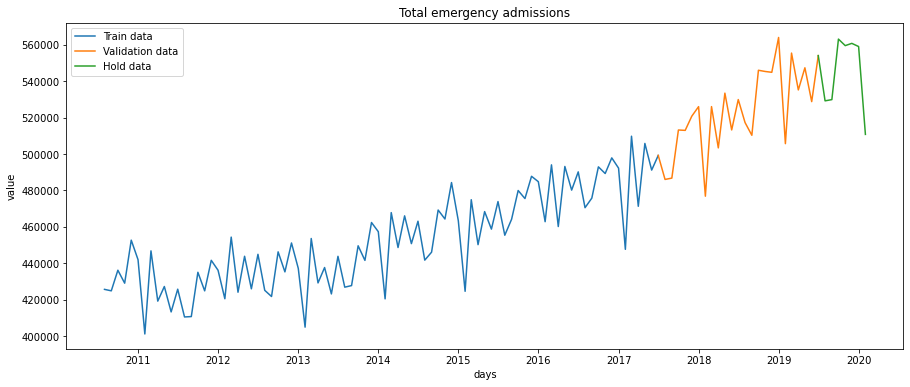

In [40]:
plt.figure(figsize=(15,6))
plt.title('Total emergency admissions')
plt.plot(traindataf, label = "Train data")
plt.plot(valdataf, label = "Validation data")
plt.plot(holdf, label = "Hold data")
plt.legend()
plt.ylabel("value")
plt.xlabel("days")
plt.show()

## 4 - Auto (S)ARIMA in python

In [42]:
# Import required PMDARIMA package to run SARIMA models

import pmdarima as pm
#ARIMA_model = pm.auto_arima(Diff_01)
#forecast = pd.Series(ARIMA_model.predict(len(valdataf)), index = valdataf.index)

In [44]:
# SARIMA model
SARIMA_model = pm.auto_arima(traindataf,m=12,seasonal=True)

In [ ]:
# Forecast 25 months in the future using validation dataset

In [46]:
forecastSARIMA = pd.Series(SARIMA_model.predict(len(valdataf)), index = valdataf.index)

### 4.1 Plot SARIMA forecast 

In [181]:
forecastSARIMA_rename = forecastSARIMA.rename('Training SARIMA forecast')

In [182]:
type(forecastSARIMA_rename)

pandas.core.series.Series

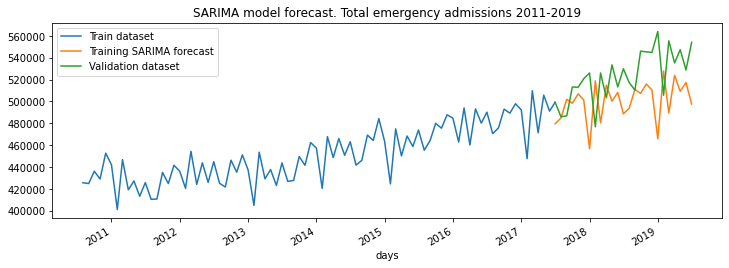

In [206]:
plt.figure(figsize=(12,4))
plt.title('SARIMA model forecast. Total emergency admissions 2011-2019')
plt.plot(traindataf, label = "Train dataset")  # Dataset
forecastSARIMA_rename.plot() # Series 
plt.plot(valdataf, label = "Validation dataset") # Dataset
plt.legend()
plt.xlabel("days")
plt.show()

### 5. Compute MAPE value

In [ ]:
 # Proir to compute the MAPE value, you need to turn the objects used in its formula into a Pandas object 

In [65]:
type(valdataf)

pandas.core.frame.DataFrame

In [66]:
type(forecastSARIMA)

pandas.core.series.Series

### 5.1 Rename from ValdataNEW  datarame  as Value

In [100]:
ValdataNEW = valdataf.rename(columns={'Total Emergency Admissions':'Value'})

In [102]:
ValdataNEW.head()

,Value
Period,
2017-07-01,499259
2017-08-01,486074
2017-09-01,486799
2017-10-01,513217
2017-11-01,513019


### 5.2 Convert Forecast output into a Dataframe and rename column as "Value" 

In [103]:
# Turn forecastSARIMA into a Pandas object 
fSARIMAdataframe = pd.DataFrame(forecastSARIMA)

In [104]:
ForecastNEW = fSARIMAdataframe.rename(columns={0:'Value'})

In [135]:
ForecastNEW.head()

,Value
Period,
2017-07-01,479592.0
2017-08-01,484846.0
2017-09-01,502021.0
2017-10-01,498364.0
2017-11-01,506953.0


### 5.3 Check that we can do calculations on both datarames 

In [111]:
ValdataNEW-ForecastNEW

,Value
Period,
2017-07-01,19667.0
2017-08-01,1228.0
2017-09-01,-15222.0
2017-10-01,14853.0
2017-11-01,6066.0
2017-12-01,19492.0
2018-01-01,69319.0
2018-02-01,-41976.0
2018-03-01,45700.0


### 5.4 Build the MAPE function based on Dataframes 

In [171]:
def accuray_MAPE(ACT,FCAST):
  #  Value = abs((ACT-FCAST)/ACT).sum()/len(ACT)
    Value_percent = (abs((ACT-FCAST)/ACT).sum()/len(ACT))*100
    Mape_value = print(f"Seasonal ARIMA model MAPE value in percent   {Value_percent}")
    #Mape_value_per = print(f"Seasonal ARIMA model MAPE {Value}")
    return Value_percent

In [172]:
accuray_MAPE(ValdataNEW,ForecastNEW)

Seasonal ARIMA model MAPE value in percent   Value    5.666376
dtype: float64


Value    5.666376
dtype: float64